In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Chargement des données
tips = sns.load_dataset("tips")

### Aperçu et types

In [15]:
# 5 premières lignes
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Noms des colonnes
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
# Type de chaque colonne
tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


### Statistiques descriptives

In [ ]:
# Affiche les statistiques de base pour total_bill, tip et size
tips[["total_bill", "tip", "size"]].describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Valeurs manquantes

In [22]:
# Check les valeurs null
tips.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [24]:
# Addition des valeurs null
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


### Histogrammes

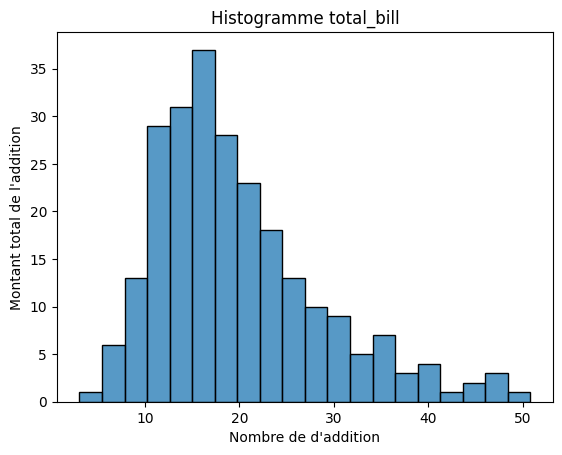

In [34]:
sns.histplot(tips["total_bill"], bins=20)
plt.title("Histogramme total_bill")
plt.ylabel("Montant total de l'addition")
plt.xlabel("Nombre de d'addition")
plt.show()

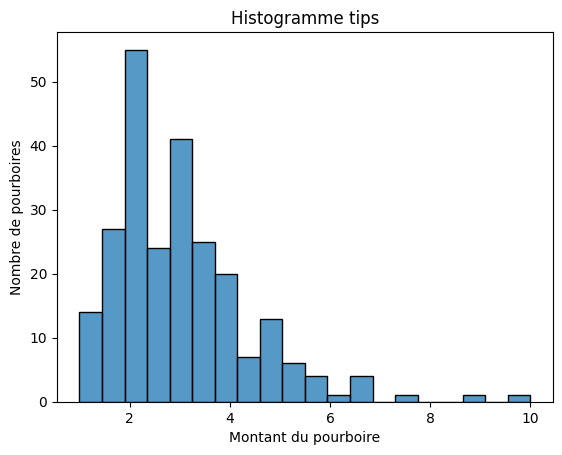

In [35]:
sns.histplot(tips["tip"], bins=20)
plt.title("Histogramme tips")
plt.xlabel("Montant du pourboire")
plt.ylabel("Nombre de pourboires")
plt.show()

### Moyennes groupées

##### Affiche la moyenne des pourboires (tip) par :

In [43]:
# sex
tips.groupby("sex")["tip"].mean()

<ipython-input-43-224551767>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hh = tips.groupby("sex")["tip"].mean()


,tip
sex,
Male,3.089618
Female,2.833448


In [45]:
# smoker
tips.groupby("smoker")["tip"].mean()

<ipython-input-45-3828584968>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].mean()


,tip
smoker,
Yes,3.008710
No,2.991854


In [46]:
# day
tips.groupby("day")["tip"].mean()

<ipython-input-46-2120056779>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["tip"].mean()


,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


### Pourboire moyen par nombre de personnes

In [47]:
# Quelle est la moyenne des pourboires en fonction de la taille de la table (size) ?
tips.groupby("size")["tip"].mean()

,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


### Table croisée

In [50]:
# Crée une table croisée (pivot table) des pourboires moyens par day et time.
tips.pivot_table(values="tip", index="day", columns="time", aggfunc="mean")

<ipython-input-50-3012826991>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(values="tip", index="day", columns="time", aggfunc="mean")


time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


### Proportion des fumeurs

In [52]:
# Pourcentage de fumeurs
tips["smoker"].value_counts(normalize=True) * 100

,proportion
smoker,
No,61.885246
Yes,38.114754


In [56]:
# Pourcentage de fumeurs homme/femme
tips.groupby("sex")["smoker"].value_counts(normalize=True).unstack() * 100

<ipython-input-56-2200546620>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["smoker"].value_counts(normalize=True).unstack() * 100


smoker,Yes,No
sex,,
Male,38.216561,61.783439
Female,37.931034,62.068966


### Boîte à moustaches (boxplot)

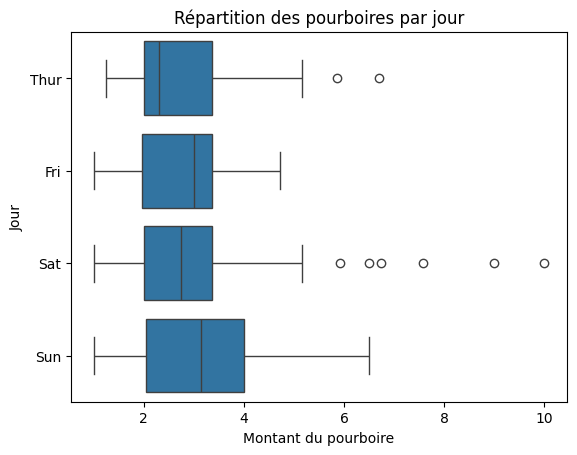

In [58]:
# Trace un boxplot de tip par day. Quels jours présentent une plus grande variabilité ?
sns.boxplot(data=tips, x="tip", y="day")
plt.title("Répartition des pourboires par jour")
plt.xlabel("Montant du pourboire")
plt.ylabel("Jour")
plt.show()

### Scatterplot

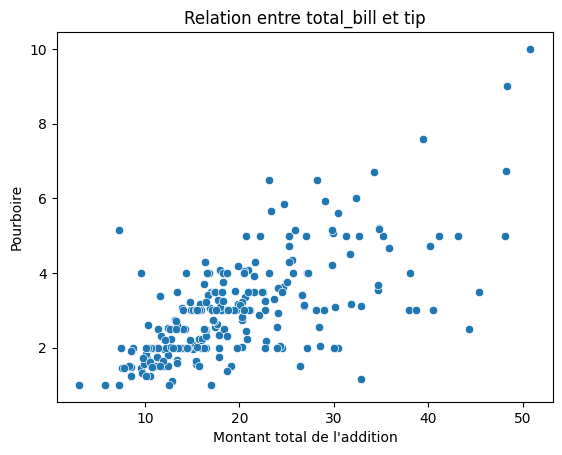

In [3]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Relation entre total_bill et tip")
plt.xlabel("Montant total de l'addition")
plt.ylabel("Nombre de pourboires")
plt.show()

### Corrélations linéaires

In [7]:
# Corrélation entre total_bill et tip
corr_total_tip, pval_total_tip = pearsonr(tips["total_bill"], tips["tip"])
corr_total_tip, pval_total_tip

(np.float64(0.6757341092113645), np.float64(6.692470646863728e-34))

In [6]:
# Corrélation entre size et tip
corr_size_tip, pval_size_tip = pearsonr(tips["size"], tips["tip"])
corr_size_tip, pval_size_tip

(np.float64(0.48929877523035725), np.float64(4.300543327224998e-16))

### Corrélations catégorielles

In [10]:
# sex
tips.groupby("sex")["tip"].mean()

<ipython-input-10-2812444464>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["tip"].mean()


,tip
sex,
Male,3.089618
Female,2.833448


In [12]:
# smoker
tips.groupby("smoker")["tip"].mean()

<ipython-input-12-3828584968>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].mean()


,tip
smoker,
Yes,3.008710
No,2.991854


In [13]:
# day
tips.groupby("day")["tip"].mean()

<ipython-input-13-2120056779>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["tip"].mean()


,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


In [14]:
# time
tips.groupby("time")["tip"].mean()

<ipython-input-14-1503159168>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("time")["tip"].mean()


,tip
time,
Lunch,2.728088
Dinner,3.102670


### Différences

In [15]:
tips.groupby("smoker")["tip"].mean()

<ipython-input-15-637511320>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].mean()


,tip
smoker,
Yes,3.008710
No,2.991854


In [16]:
tips.groupby("smoker")["tip"].median()

<ipython-input-16-1514987245>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].median()


,tip
smoker,
Yes,3.00
No,2.74


In [17]:
tips.groupby("smoker")["tip"].describe()

<ipython-input-17-1495809714>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0


### Pourboire proportionnel à l'addition

In [20]:
# Crée une nouvelle colonne tip_pct = tip / total_bill
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [22]:
# Calcule sa moyenne et son écart-type
mean_tips = tips["tip_pct"].mean()
std_tips = tips["tip_pct"].std()
mean_tips, std_tips

(np.float64(0.16080258172250472), 0.061072204191571944)

###Qui donne les plus gros pourboires en proportion ?

In [27]:
# sex
tips.groupby("sex")["tip_pct"].describe()

<ipython-input-27-1775025570>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["tip_pct"].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,0.157651,0.064778,0.035638,0.121389,0.153492,0.186240,0.710345
Female,87.0,0.166491,0.053632,0.056433,0.140416,0.155581,0.194266,0.416667


In [29]:
# smoker
tips.groupby("smoker")["tip_pct"].describe()

<ipython-input-29-876092318>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip_pct"].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990


In [28]:
# day
tips.groupby("day")["tip_pct"].describe()

<ipython-input-28-474440537>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["tip_pct"].describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,0.161276,0.038652,0.072961,0.138210,0.153846,0.192687,0.266312
Fri,19.0,0.169913,0.047665,0.103555,0.133739,0.155625,0.196637,0.263480
Sat,87.0,0.153152,0.051293,0.035638,0.123863,0.151832,0.188271,0.325733
Sun,76.0,0.166897,0.084739,0.059447,0.119982,0.161103,0.187889,0.710345


### Conversion en NumPy

In [30]:
tip_array = tips[["total_bill", "tip"]].to_numpy()

tip_array.shape

(244, 2)

### Calculs vectorisés

In [32]:
tips_np = tips["tip"].to_numpy()

In [33]:
# pourboire moyen
np.mean(tips_np)

np.float64(2.99827868852459)

In [35]:
# pourboire maximal
np.max(tips_np)

np.float64(10.0)

In [37]:
# somme des pourboires pour les additions supérieures à 30 €
total_bill_np = tips["total_bill"].to_numpy()
np.sum(tips_np[total_bill_np > 30])

np.float64(146.66)

### Filtrage conditionnel avec NumPy

In [39]:
tip_np = tips["tip"].to_numpy()
size_np = tips["size"].to_numpy()

# Masque : tables de minimum 4 personnes
mask = size_np >= 4

# Sélection des pourboires avec le masque
large_party_tips = tip_np[mask]

# Moyenne des pourboires
large_party_tips.mean()

np.float64(4.218478260869565)

### Indexation booléenne avec Pandas

In [43]:
# pourboire > 20% de l'addition
high_tip_pct = tips[tips["tip_pct"] > 0.2]

high_tip_pct.shape[0]

39

### Application de fonctions personnalisées

In [45]:
def tip_level(tip):
    if tip < 2:
        return "faible"
    elif tip < 5:
        return "moyen"
    else:
        return "élevé"

In [47]:
# Utilisation de .apply() pour créer une nouvelle colonne tip_level
tips["tip_level"] = tips["tip"].apply(tip_level)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_level
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,faible
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,faible
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,moyen
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,moyen
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,moyen


In [48]:
# Répartition des catégories
tips["tip_level"].value_counts()

,count
tip_level,
moyen,171
faible,45
élevé,28


### Création de colonnes avec np.where

In [50]:
tips["is_large_party"] = np.where(tips["size"] >= 4, True, False)
tips["is_large_party"].value_counts()

,count
is_large_party,
False,198
True,46


### Tri avec NumPy

In [52]:
total_bill_np = tips["total_bill"].to_numpy()

np.sort(total_bill_np)[-10:][::-1]
# [-10:] -> 10 plus grandes valeurs
# [::-1] ordre décroissant

array([50.81, 48.33, 48.27, 48.17, 45.35, 44.3 , 43.11, 41.19, 40.55,
       40.17])

### Groupes et écart-type

In [57]:
# Écart-type tip_pct par jour
tips.groupby("day")["tip_pct"].std()

<ipython-input-57-2835441368>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["tip_pct"].std()


,tip_pct
day,
Thur,0.038652
Fri,0.047665
Sat,0.051293
Sun,0.084739


### Masquage NumPy avancé

In [60]:
tip_np = tips["tip"].to_numpy()
time_np = tips["time"].to_numpy()
smoker_np = tips["smoker"].to_numpy()

mask = (tip_np > 5) & (time_np == "Dinner") & (smoker_np == "Yes")

np.sum(mask)

np.int64(6)

### Jointure avec concaténation

In [61]:
# Sépare les données en deux DataFrames : un pour les hommes (sex == "Male"), un pour les femmes
tips_male = tips[tips["sex"] == "Male"]
tips_female = tips[tips["sex"] == "Female"]

In [63]:
# Concatène-les verticalement
tips_concat = pd.concat([tips_male, tips_female])
tips_concat

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_level,is_large_party
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,faible,False
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,moyen,False
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,moyen,False
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240,moyen,True
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050,moyen,False
...,...,...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2,0.198216,moyen,False
229,22.12,2.88,Female,Yes,Sat,Dinner,2,0.130199,moyen,False
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130338,moyen,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,moyen,False


In [65]:
# Vérifie si l’index est bien conservé ou non
tips_concat.index.equals(tips.index)

False